# 1. Import Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from gensim import utils
import gensim.parsing.preprocessing as gsp

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import preprocessing
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

import xgboost


# 2. Load Data


In [0]:
# Load datasets
df_test = pd.read_csv('BBC News Test.csv')
df_train = pd.read_csv('BBC News Train.csv')

# 3. Data info

## 3.1. Train data

In [54]:
print(df_train.info())
print()
print(df_train.describe())
print()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None

         ArticleId
count  1490.000000
mean   1119.696644
std     641.826283
min       2.000000
25%     565.250000
50%    1112.500000
75%    1680.750000
max    2224.000000



,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


## 3.2. Test Data

In [55]:
print(df_test.info())
print()
print(df_test.describe())
print()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
None

         ArticleId
count   735.000000
mean   1099.424490
std     643.925514
min       1.000000
25%     545.500000
50%    1116.000000
75%    1657.500000
max    2225.000000



,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


- The train dataset contains 1490 rows  and the test dataset contains 735 rows
- The target column is  **category**

In [56]:
#List unique values in the category column
df_train.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

- We have 5 categories over all:
    - business
    - tech
    - politics
    - sport
    - entertainment

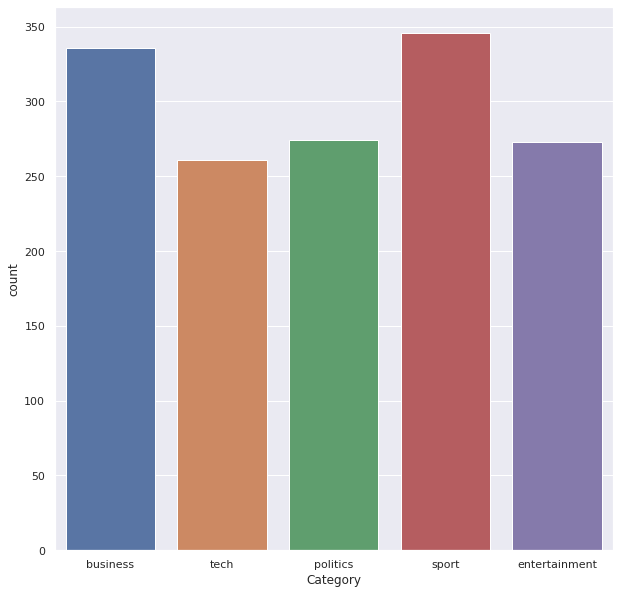

In [57]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(df_train.Category)

- The datatset seems balanced 

# 4. Data Clean

In [58]:
# print second row of text
df_train.iloc[2,1]

'bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll believe the world economy is worsening.  most respondents also said their national economy was getting worse. but when asked about their own family s financial outlook  a majority in 14 countries said they were positive about the future. almost 23 000 people in 22 countries were questioned for the poll  which was mostly conducted before the asian tsunami disaster. the poll found that a majority or plurality of people in 13 countries believed the economy was going downhill  compared with respondents in nine countries who believed it was improving. those surveyed in three countries were split. in percentage terms  an average of 44% of respondents in each country said the world economy was getting worse  compared to 34% who said it was improving. similarly  48% were pessimistic about their national economy  while 41% were optimistic. and 47% saw their family s economic conditions impr

In [0]:
filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [60]:
clean_text(df_train.iloc[2,1])

'bbc poll indic econom gloom citizen major nation survei bbc world servic poll believ world economi worsen respond said nation economi get wors ask famili financi outlook major countri said posit futur peopl countri question poll conduct asian tsunami disast poll major plural peopl countri believ economi go downhil compar respond countri believ improv survei countri split percentag term averag respond countri said world economi get wors compar said improv similarli pessimist nation economi optimist saw famili econom condit improv said get wors poll peopl conduct intern poll firm globescan program intern polici attitud pipa univers maryland world economi pick difficult time year ago peopl fulli absorb develop person experienc effect said pipa director steven kull peopl world sai world isn percept war terror religi polit divis make world wors place far reflect global econom perform sai bbc elizabeth blunt countri peopl optimist world famili fast grow develop economi china india follow in

In [0]:
def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

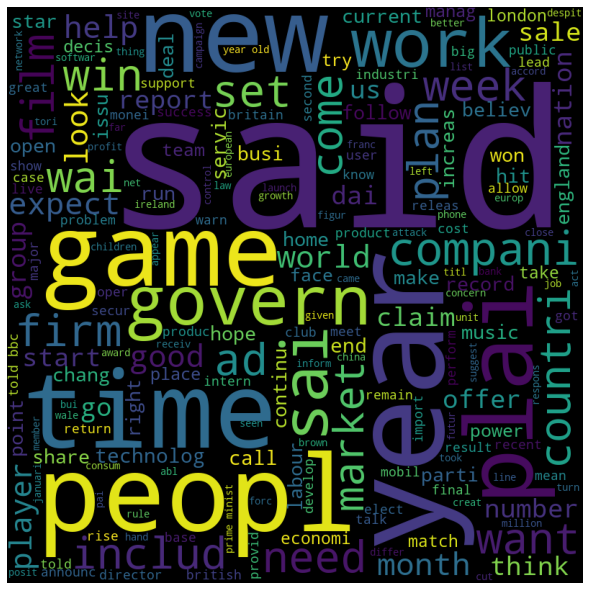

In [62]:
texts = ''
for index, item in df_train.iterrows():
    texts = texts + ' ' + clean_text(item['Text'])
    
plot_word_cloud(texts)

In [0]:
def plot_word_cloud_for_category(bbc_text_df, category):
    text_df = bbc_text_df.loc[bbc_text_df['Category'] == str(category)]
    texts = ''
    for index, item in text_df.iterrows():
        texts = texts + ' ' + clean_text(item['Text'])
    
    plot_word_cloud(texts)

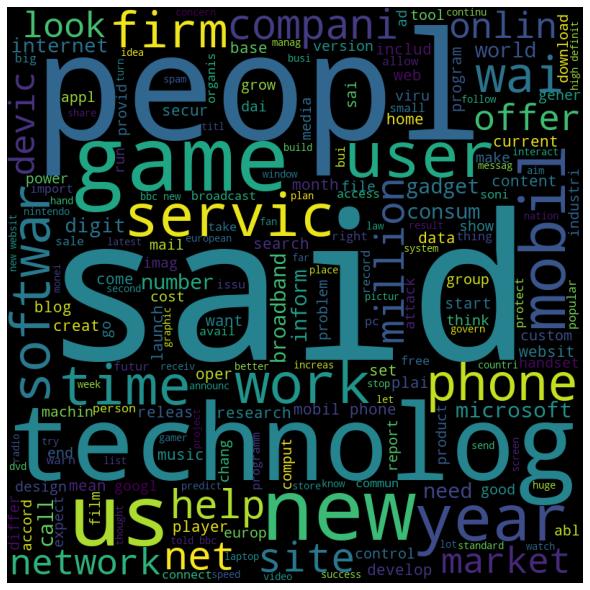

In [64]:
plot_word_cloud_for_category(df_train,'tech')

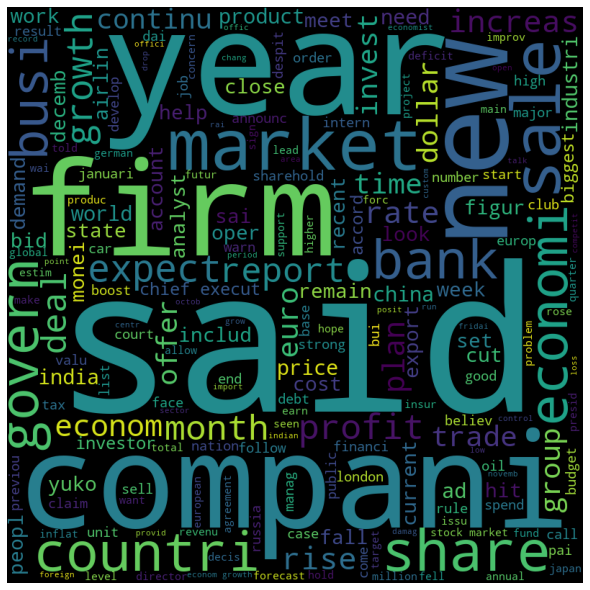

In [65]:
plot_word_cloud_for_category(df_train,'business')

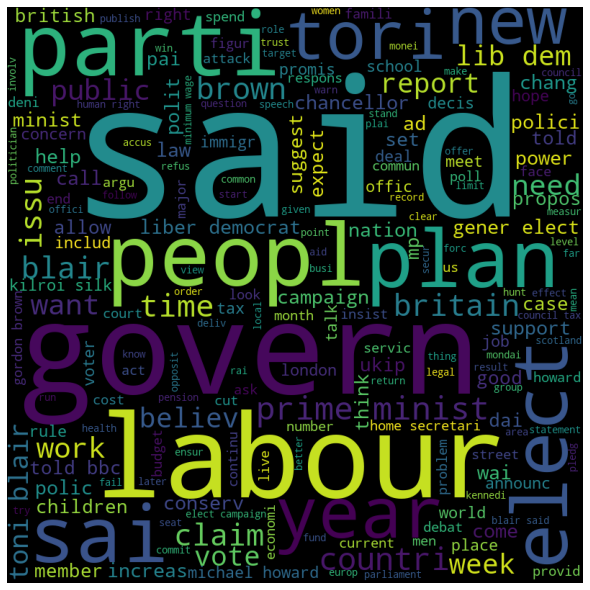

In [66]:
plot_word_cloud_for_category(df_train,'politics')

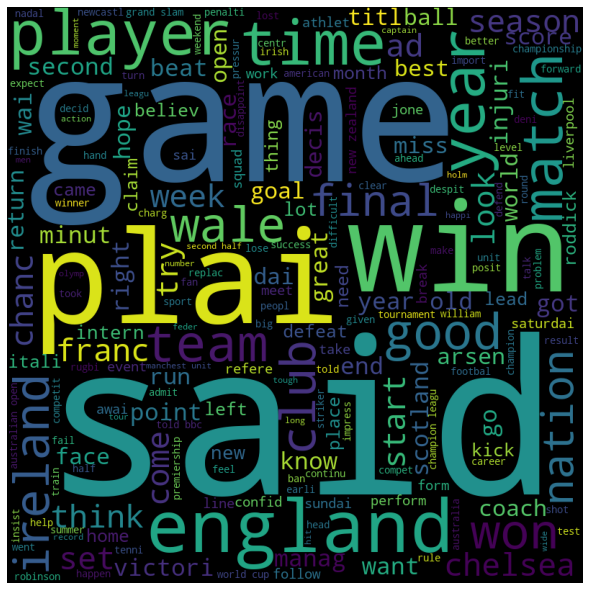

In [67]:
plot_word_cloud_for_category(df_train,'sport')

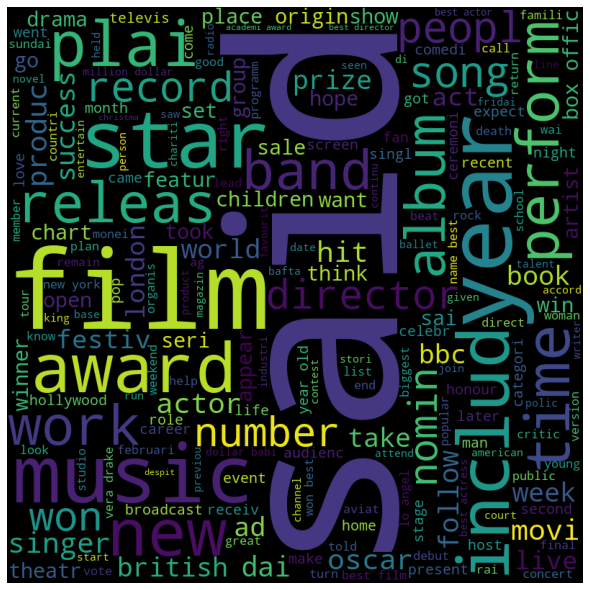

In [68]:
plot_word_cloud_for_category(df_train,'entertainment')

# 4. Model

## 4.1. Data preparation

In [0]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = train_test_split(df_train.Text, df_train.Category)

train_labels = train_y
valid_labels = valid_y
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

## 4.2. Feature Extraction

TF-IDF Vectors as features

a. Word Level TF-IDF : Matrix representing tf-idf scores of every term in different documents

b. N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams

c. Character Level TF-IDF : Matrix representing tf-idf scores of character level n-grams in the corpus

### 4.2.1. Word Level TF-IDF

In [0]:
# plot the train features
def plot_features(features):
  pca = PCA(n_components=2).fit(features.toarray())
  data2D = pca.transform(features.toarray())
  cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
  ax = sns.scatterplot(data2D[:,0], data2D[:,1], hue=train_labels.tolist(),size=train_labels.tolist(),palette="husl")

In [0]:
tfidf_vect_word = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect_word.fit(df_train.Text)
xtrain_tfidf_word =  tfidf_vect_word.transform(train_x)
xvalid_tfidf_word =  tfidf_vect_word.transform(valid_x)

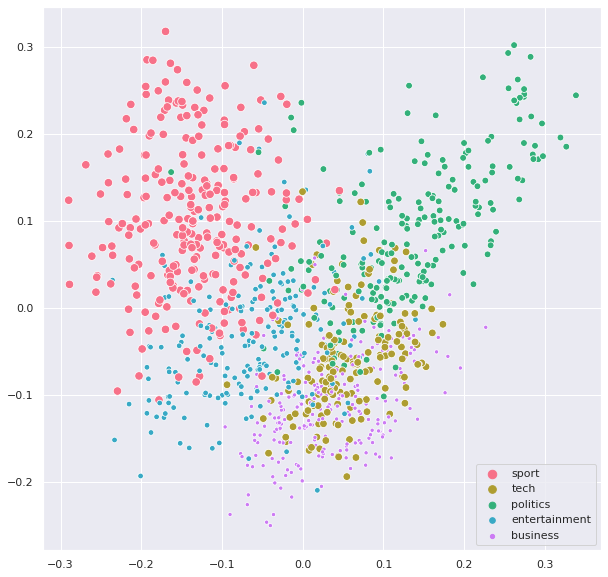

In [72]:
plot_features(xtrain_tfidf_word)

### 4.2.2. N-gram Level TF-IDF

In [0]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df_train.Text)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

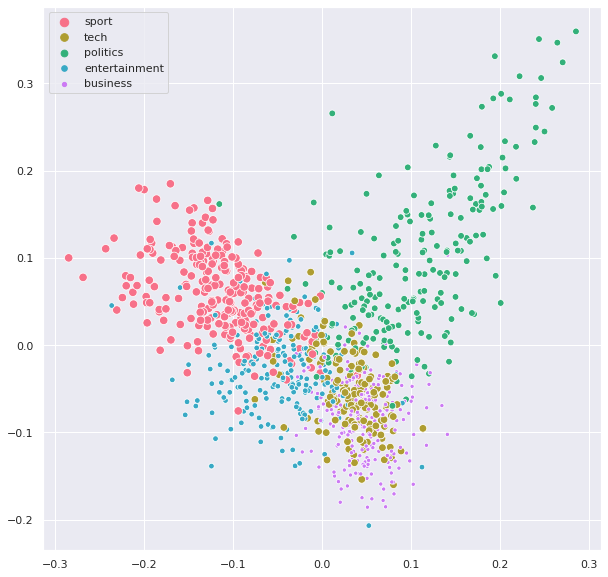

In [74]:
plot_features(xtrain_tfidf_ngram)

### 4.2.3. Character Level TF-IDF

In [75]:
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df_train.Text)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


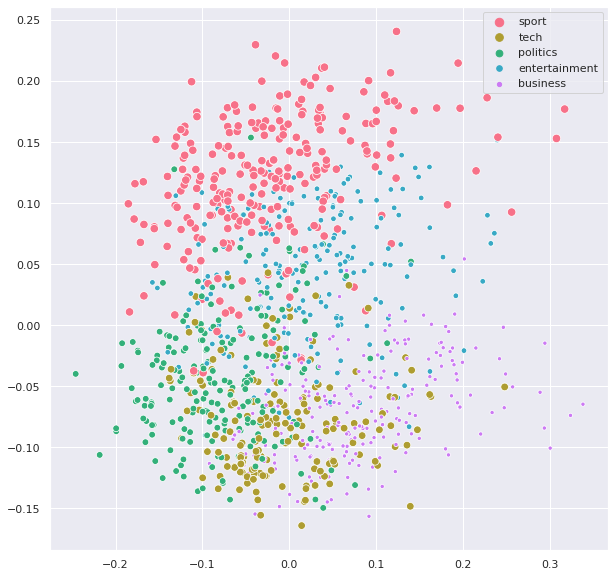

In [76]:
plot_features(xtrain_tfidf_ngram_chars)

## 4.3. Model Building

In [0]:
# training function
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

### 4.3.1 XGBoost classifier

In [78]:
# Extreme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_word.tocsc(), train_y, xvalid_tfidf_word.tocsc())
print("Xgb, WordLevel TF-IDF: ", accuracy)

Xgb, WordLevel TF-IDF:  0.9436997319034852


In [80]:
# Extreme Gradient Boosting on Ngram Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("Xgb, N-Gram Vectors: ", accuracy)

Xgb, N-Gram Vectors:  0.868632707774799


In [81]:
# Extreme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print("Xgb, CharLevel Vectors: ", accuracy)

Xgb, CharLevel Vectors:  0.9410187667560321
